<a id='Top'></a>
***
<div class="alert alert-block alert-info">
</div>



# Exploration

Let's explore the interactions of all attributes and target variable to help discover drivers of our target variable. 

<div class="alert alert-block alert-info">
</div>

---
|----Top----|----Q1----|----Q2----|
|---|---|---|
|[__Go to TOP__](#Top)|[__Go to Q1__](#Q1)|[__Go to Q2__](#Q2)|

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

import wrangle

## Acquire and Prepare Data

We're going to acquire the student grade data like we saw in the prior lesson.

In [3]:
# Use our wrangle function to acquire and prepare our data.
# train validate test = wrangle.wrangle_zillow()

df = pd.read_csv('student_grades.csv')

In [4]:
#look at your data!
df

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97
...,...,...,...,...,...
99,100,70.0,65,78,77
100,101,62.0,70,79,70
101,102,58.0,65,70,68
102,103,57.0,65,75,65


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        104 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [11]:
# df = df.replace(r'^/s*$', np.nan, regex=True)
df = df.replace(r'^\s*$', np.nan, regex=True)

In [12]:
df.dropna().shape

(102, 5)

In [13]:
df = df.dropna()

In [16]:
df.exam3 = df.exam3.astype(int)

In [19]:
df.exam1 = df.exam1.astype(int)

In [20]:
# verify student_id is unique
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   102 non-null    int64
 1   exam1        102 non-null    int64
 2   exam2        102 non-null    int64
 3   exam3        102 non-null    int64
 4   final_grade  102 non-null    int64
dtypes: int64(5)
memory usage: 4.8 KB


In [21]:
df.describe()

,student_id,exam1,exam2,exam3,final_grade
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,53.313725,78.833333,77.500000,84.294118,81.970588
std,29.886909,14.167375,10.297313,8.736617,10.833991
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,28.250000,70.000000,70.000000,78.000000,72.000000
50%,53.500000,79.000000,75.000000,85.000000,81.000000
75%,78.750000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


#### target variable?
- final grade!
- continious aka regression problem

#### other variables of value?
- exam1, exam2, exam3
- all continious

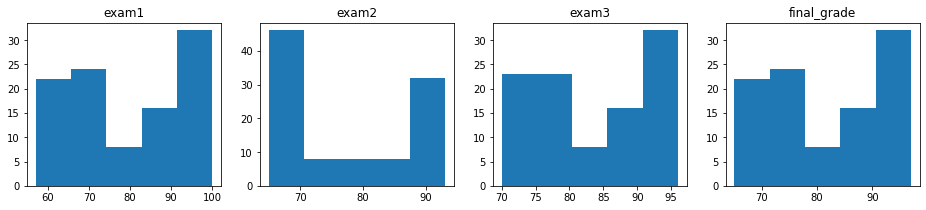

In [22]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['exam1', 'exam2', 'exam3', 'final_grade']
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(1,4,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    df[col].hist(bins=5)
    # Hide gridlines.
    plt.grid(False)

### What must we do before exploring relationships? 

In [23]:
from prepare import split_data

In [24]:
train, validate, split = split_data(df, 'final_grade')

Prepared df: (102, 5)

Train: (60, 5)
Validate: (21, 5)
Test: (21, 5)


## Explore

### Why Explore?
 - What is the purpose of this pipeline stage?

### Main Stages in Exploration
- Hypothesize
- Visualize
    - Plot out the distributions of each feature 
     - Why?
    - Plot out the interaction of two or more variables?
     - Why?
    - Plot out how subgroups compare to each-other and to the overall population?
     - Why?
    - Document takeaways
     - Why?
    - Identify features that correlate with each other
     - Why?

- Test Hypotheses

### Types of Visualizations

- **Univariate Distributions**
    
    - Continuous variable distributions
        - ?
        - ?
        - ? 
    - Discrete variable distributions
        - ?


- **Bi- and multi-variate relationships** 

    - Continuous with Continuous
        - ?
        - ?
        - ?
        - ?
        - ?
    - Discrete with Continuous
        - ?
        - ?
        - ?
        - ?
        - ?
        
    - Discrete with Discrete
        - ?

<a id='Q1'></a>
___

## Explore our exam dataset
### Goal

> I'm a university professor hoping I can build a prediction model that will be able to use these exams to predict the final grade within 5 points average per student.

___
<div class="alert alert-block alert-info">
</div>

## Q1. Is there a relationship between exam1 and final grade? 

<div class="alert alert-block alert-info">
</div>

---
|----Top----|----Q1----|----Q2----|
|---|---|---|
|[__Go to TOP__](#Top)|[__Go to Q1__](#Q1)|[__Go to Q2__](#Q2)|

### Hypothesis

- ${H_0}$: There is no linear correlation between exam1 and final grade
- ${H_a}$: There is a linear correlation between exam1 and final grade

### Visualize

### `sns.heatmap()`

Let's look at a heatmap of the correlation coefficients for a dataset.

1. Determine if normally distributed
    - if normal, use pearsons method
    - if not, use spearman
2. Calculate the correlation coefficient for each pair of variables
    - use pandas `.corr()` 
    - it defaults to `method=pearson`
    - can change to `method=spearman`
3. Use correleation coefficients to generate heatmap 


In [26]:
# create the correlation matrix using pandas .corr()
exam_corr = train.corr()

<AxesSubplot:>

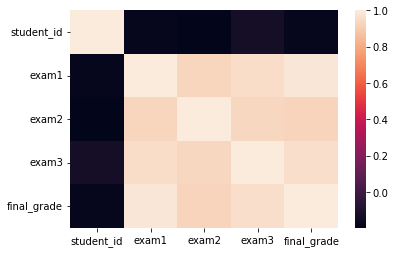

In [27]:
# pass my correlation matrix to Seaborn's heatmap
sns.heatmap(exam_corr)

In [1]:
# pass my correlation matrix to Seaborn's heatmap with customization
sns.heatmap(exam_corr)

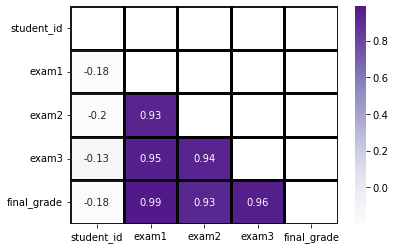

In [32]:
# pass my correlation matrix to Seaborn's heatmap with more customization! 
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black'}

sns.heatmap(exam_corr, cmap='Purples', annot=True,
           mask=np.triu(exam_corr), **kwargs)
plt.show()

### Test Hypothesis

In [33]:
# Since my variables are not normally distributed, 
# use scipy stats function spearmanr to calculate correlation and p-value 
r, p_value = spearmanr(train.exam1, train.final_grade)

In [34]:
print(f'Correlation Coefficient by Spearman Test: {r}\np-value: {p_value}')

Correlation Coefficient by Spearman Test: 0.9757948131456056
p-value: 5.476347597441403e-40


In [35]:
# set alpha : 0.05
if p_value < 0.05:
    print('We can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

We can reject the null hypothesis


#### Heatmap Takeaways

- Although all of the exams have very high positive correlations with the target variable, `exam1` and `final_grade` are almost perfectly correlated. This looks to be the best predictor of our target variable.
- Based on my correlation coefficient and my p-value, **I reject my Null hypothesis that there is no correlation between `exam1` and `final_grade`.**
- Looking at the correlation between our independent variables, they also have high positive correlations with each other, multicollinearity. This informs me that I don't want to use all of them together in a linear regression model. 
- When building my model, I will choose `exam1` and perform a simple linear regression first. If I want to go back and do some feature engineering with my other independent variables, I could do that and see if I can improve on my accuracy.

### What other visualizations could we have used?

### `sns.relplot()`

Let's do a simple scatter plot of two continuous variables in our dataset.

In [37]:
train

,student_id,exam1,exam2,exam3,final_grade
50,51,57,65,75,65
63,64,57,65,75,65
49,50,58,65,70,68
1,2,98,93,96,95
8,9,70,65,78,77
94,95,83,80,86,85
81,82,83,80,86,85
60,61,70,65,78,77
56,57,93,90,96,97
93,94,85,83,87,87


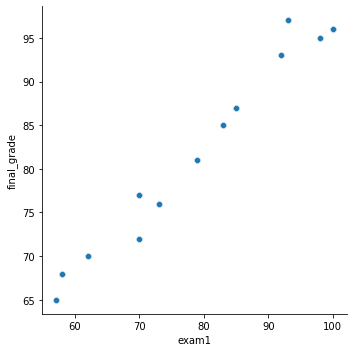

In [39]:
sns.relplot(data=train, x='exam1', y= 'final_grade')
plt.show()

### `sns.lmplot()`

Let's make that simple scatter plot but add a regression line.

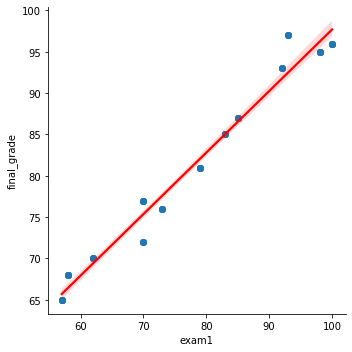

In [41]:
# I can really pop that line color if I want
sns.lmplot(data=train, x='exam1', y= 'final_grade', line_kws={'color':'red'})
plt.show()

### `sns.jointplot()`

Let's use a `sns.jointplot()` with `kind=reg` to view individual variable distributions for our x and y along with a scatter plot with regression line.

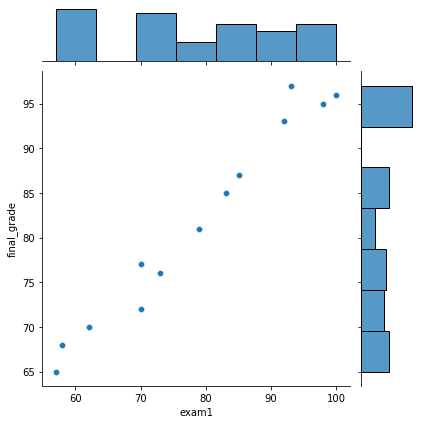

In [44]:
sns.jointplot(data=train[['exam1','exam2','exam3', 'final_grade']],
              x='exam1',
              y='final_grade'
             )

### `sns.pairplot()`

Let's use `sns.pairplot()` to view a scatter plot visualizing the relationships between all of the numeric columns in our dataset all at once as well as individual distributions for each individual column.

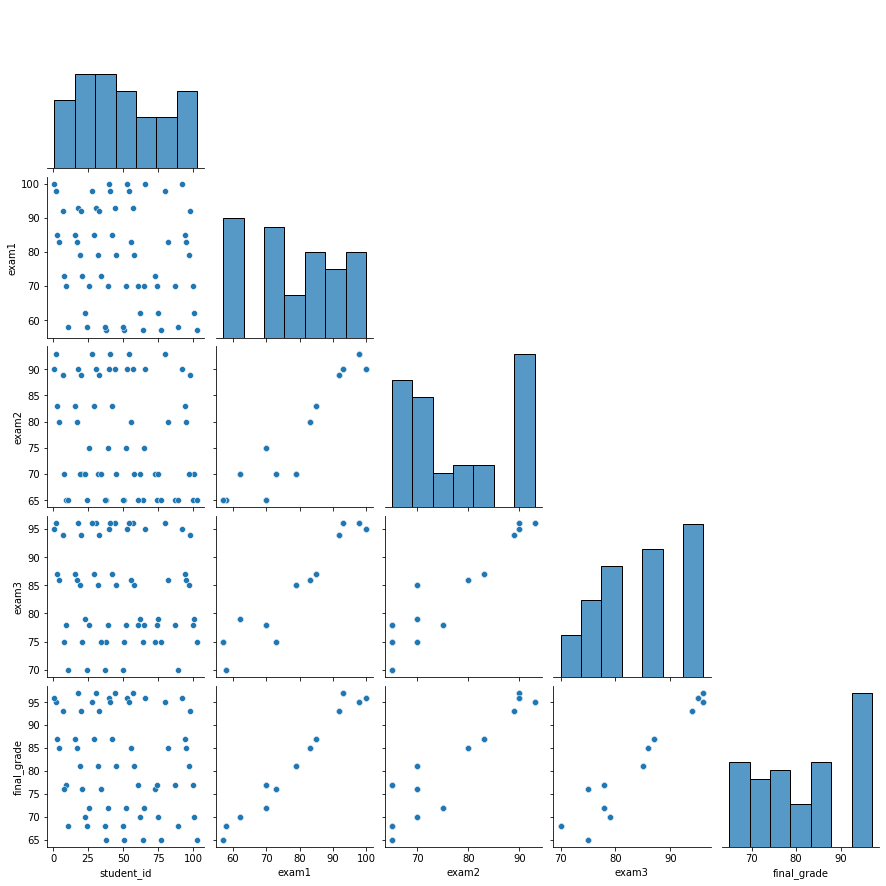

In [46]:
# We can drop the redundant information in the upper right half of the chart if we like.
sns.pairplot(data=train, corner=True)

plt.show()

Takeways
- My `relplot`, `lmplot`, and `joinplots` charts show me that there is a linear relationship between `exam1` and `final_grade`.
- My `pairplot` shows me that there are linear relationships between the other exams scores, as well 

<a id='Q2'></a>
___
<div class="alert alert-block alert-info">
</div>

## Q2: Is there a cutoff in grade that makes sense to investigate? Passing/failing/letter grades?

<div class="alert alert-block alert-info">
</div>

---
<!-- |----Top----|----Q1----|----Q2----|
|---|---|---| -->
|[--__Go to TOP__--](#Top)|[--__Go to Q1__--](#Q1)|[--__Go to Q2__--](#Q2)|

In [48]:
#number of people who failed each test

for col in train.columns[1:]:
    print(f'On {col}, {(train[col] <70).sum()} students failed')

On exam1, 14 students failed
On exam2, 15 students failed
On exam3, 0 students failed
On final_grade, 10 students failed


### Make categorical values for further exploration

In [ ]:
#assign fail and pass for each test


In [50]:
train['exam1_pass'] = np.where((train.exam1 <70), 'fail', 'pass')

### Whats the relationship between passing exam1 and the final_exam grade?

In [ ]:
#seaborn histplot 


#set line for passing level


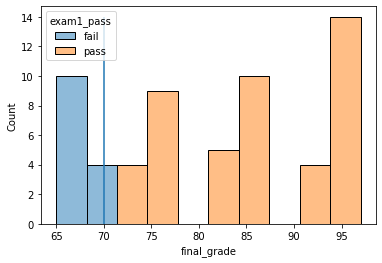

In [53]:
sns.histplot(data=train, 
             x= train.final_grade,
             hue=train.exam1_pass,
             bins=10
            )
plt.vlines(70,0,14)
plt.show()

In [60]:
#mean final_grade by exam1 pass/fail status
train.groupby('exam1_pass').value_counts()

exam1_pass  student_id  exam1  exam2  exam3  final_grade
fail        11          58     65     70     68             1
            23          62     70     79     70             1
            24          58     65     70     68             1
            37          58     65     70     68             1
            38          57     65     75     65             1
            50          58     65     70     68             1
            51          57     65     75     65             1
            62          62     70     79     70             1
            64          57     65     75     65             1
            75          62     70     79     70             1
            77          57     65     75     65             1
            89          58     65     70     68             1
            101         62     70     79     70             1
            103         57     65     75     65             1
pass        33          92     89     94     93             1
            3

### What percentage of students failed exam1 and the final?

### Of the students who failed exam1, how many also failed the final?

In [ ]:
#create subset of people who failed exam1


In [ ]:
#how many failed final


In [ ]:
#percentage who failed final


### Of the students who failed exam2, how many also failed the final?

In [ ]:
#create subset of people who failed exam2


In [ ]:
#how many failed final


In [ ]:
#percentage who failed final


### Of the students who failed both exam1 and exam2, how many also failed the final?

In [ ]:
#create subset of people who failed exam2


In [ ]:
#how many failed final


In [ ]:
#percentage who failed final


#### Takeways
- exam1 and exam2 have a better reflection if someone passes the final exam
- given the multicollinearity present, we may want to just focus on one exam
- we could create a new feature that captures if a student failed both exam1 and exam2 